In [72]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import minmax_scaling
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy.stats import norm
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV

In [2]:
df = pd.read_csv('/Users/sultanahaldawsari/Desktop/CarPrice_Assignment.csv')

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Data Understanding and Exploring 

### 1- Data Inspecting

In [4]:
df.shape

(205, 26)

In [5]:
#This indicates that we have 205 observations and 26 columns, 16 of them are numeric and 10 are objects 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
#To better understand our target
#Low std indicats that the data points are far spread out from the mean
df.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

In [8]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [9]:
df.CarName.unique()
#We can see some misspelling names

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

# 2- Data Cleaning

#### Deriving new feature + cleaning existing ones

In [10]:
#create a new column named price containing car name 
df['brand'] = df.CarName.str.split(' ').str.get(0).str.upper()

In [11]:
df['brand'] = df['brand'].replace(['VW', 'VOKSWAGEN'], 'VOLKSWAGEN')
df['brand'] = df['brand'].replace(['MAXDA'], 'MAZDA')
df['brand'] = df['brand'].replace(['PORCSHCE'], 'PORSCHE')
df['brand'] = df['brand'].replace(['TOYOUTA'], 'TOYOTA')
df.brand.unique()

array(['ALFA-ROMERO', 'AUDI', 'BMW', 'CHEVROLET', 'DODGE', 'HONDA',
       'ISUZU', 'JAGUAR', 'MAZDA', 'BUICK', 'MERCURY', 'MITSUBISHI',
       'NISSAN', 'PEUGEOT', 'PLYMOUTH', 'PORSCHE', 'RENAULT', 'SAAB',
       'SUBARU', 'TOYOTA', 'VOLKSWAGEN', 'VOLVO'], dtype=object)

In [12]:
df.drop(['CarName'],axis = 1, inplace=True)

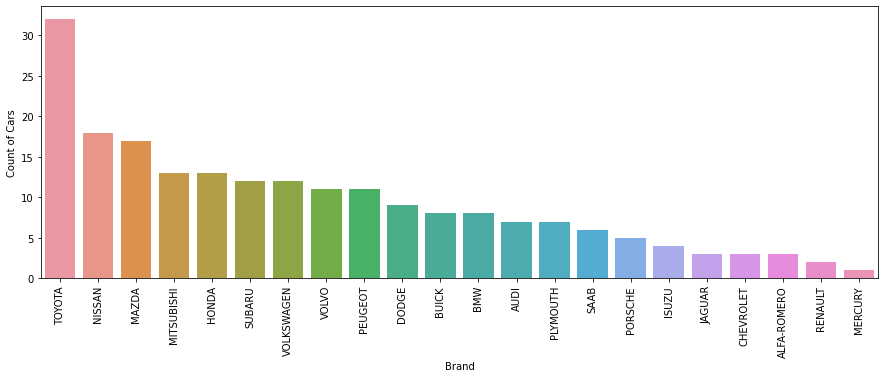

<Figure size 432x288 with 0 Axes>

In [13]:
fig, ax = plt.subplots(figsize = (15,5))
plt1 = sns.countplot(df['brand'], order=pd.value_counts(df['brand']).index,)
plt1.set(xlabel = 'Brand', ylabel= 'Count of Cars')
plt.xticks(rotation = 90)
plt.show()
plt.tight_layout()

In [14]:
#Deriving new feature so we created a new column containing both citympg and highwaympg
df['mileage'] = df['citympg']*0.55 + df['highwaympg']*0.45

In [15]:
df.drop(['citympg','highwaympg'], axis =1, inplace= True)

#### Missing Data

In [16]:
#Check for nulls
df.isna().sum()
#We don't have any missing data which is good

car_ID              0
symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
price               0
brand               0
mileage             0
dtype: int64

#### Duplicated Data

In [17]:
#duplicates checking
#We know that Id's are unique so we used it to check check for duplicates
sum(df.duplicated(subset = 'car_ID')) == 0 
#We don't have any duplicate values

True

#### Ouliers Handling

In [18]:
df_num = df[['wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize',
       'compressionratio', 'horsepower', 'peakrpm','mileage','boreratio', 'stroke']]

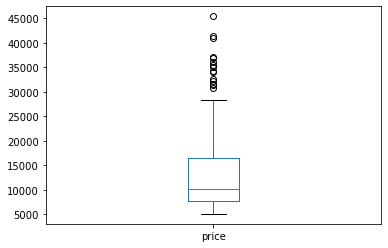

In [19]:
df.boxplot(column =['price'], grid = False);

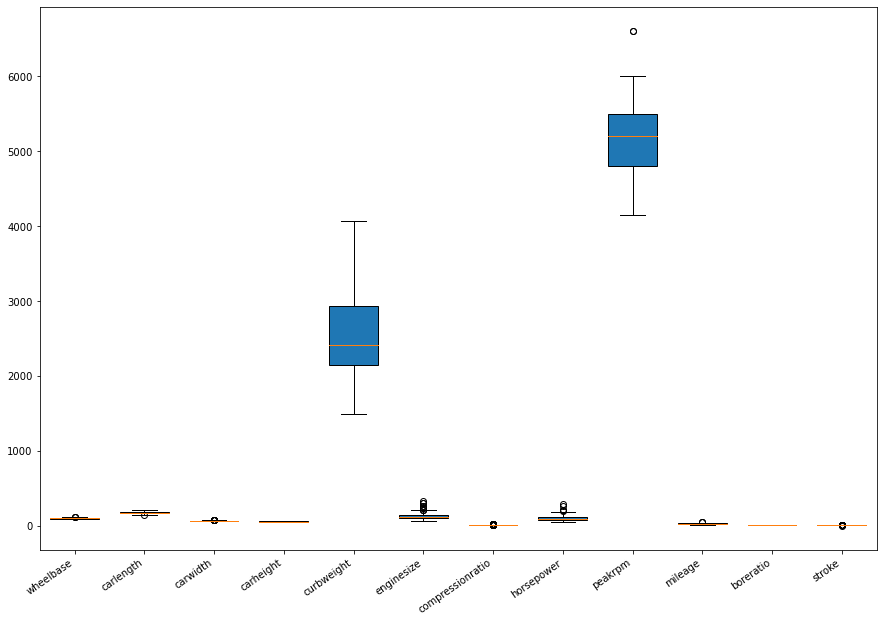

In [20]:
columns=['wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize',
       'compressionratio', 'horsepower', 'peakrpm','mileage','boreratio', 'stroke']
plt.subplots(figsize=(15, 10))
ax = plt.boxplot(df_num,labels= columns, widths = 0.7, patch_artist= True)
plt.xticks(rotation=35, ha='right');

In [21]:
df_nums = df[['wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize',
       'compressionratio', 'horsepower', 'peakrpm','mileage','boreratio', 'stroke']]

In [22]:
# We can deal with ouliers using Z-score, IQR
z = np.abs(stats.zscore(df_nums))
print(z)

[[1.6907718  0.42652147 0.84478235 ... 0.60437406 0.51907138 1.83937734]
 [1.6907718  0.42652147 0.84478235 ... 0.60437406 0.51907138 1.83937734]
 [0.70859588 0.23151305 0.19056612 ... 0.83805605 2.40488029 0.68594616]
 ...
 [1.72187336 1.19854871 1.39824472 ... 1.12450494 0.9262039  1.23202105]
 [1.72187336 1.19854871 1.39824472 ... 0.18977699 1.18348276 0.46218332]
 [1.72187336 1.19854871 1.39824472 ... 0.90589921 1.66644483 0.33696969]]


In [23]:
threshold = 3
print(np.where(z > 3))

(array([ 18,  30,  47,  48,  49,  49,  63,  73,  73,  74, 111, 113, 129,
       134, 158, 159, 165, 166, 174, 182, 184, 187, 192, 203]), array([ 9,  9,  5,  5,  5,  7,  6,  0,  5,  5, 11, 11,  7, 11,  6,  6,  8,
        8,  6,  6,  6,  6,  6,  6]))


In [24]:
df_cleaned = df_nums[(z < 3).all(axis=1)]

In [25]:
df_cleaned

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,compressionratio,horsepower,peakrpm,mileage,boreratio,stroke
0,88.6,168.8,64.1,48.8,2548,130,9.0,111,5000,23.70,3.47,2.68
1,88.6,168.8,64.1,48.8,2548,130,9.0,111,5000,23.70,3.47,2.68
2,94.5,171.2,65.5,52.4,2823,152,9.0,154,5000,22.15,2.68,3.47
3,99.8,176.6,66.2,54.3,2337,109,10.0,102,5500,26.70,3.19,3.40
4,99.4,176.6,66.4,54.3,2824,136,8.0,115,5500,19.80,3.19,3.40
...,...,...,...,...,...,...,...,...,...,...,...,...
199,104.3,188.8,67.2,57.5,3157,130,7.5,162,5100,19.25,3.62,3.15
200,109.1,188.8,68.9,55.5,2952,141,9.5,114,5400,25.25,3.78,3.15
201,109.1,188.8,68.8,55.5,3049,141,8.7,160,5300,21.70,3.78,3.15
202,109.1,188.8,68.9,55.5,3012,173,8.8,134,5500,20.25,3.58,2.87


<AxesSubplot:>

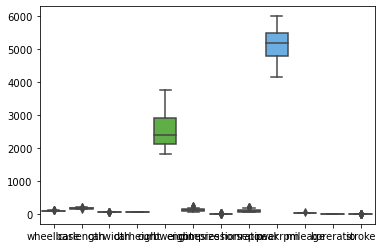

In [26]:
sns.boxplot(data = df_cleaned)

# Expolarity Data Analysis

<AxesSubplot:xlabel='price', ylabel='Density'>

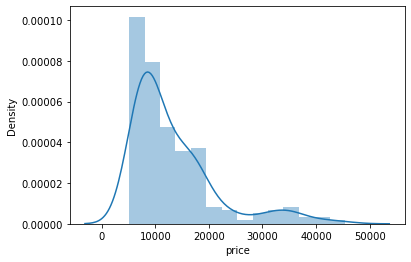

In [27]:
sns.distplot(df['price'])

### Catagorical Data Visualization with our target Price feature

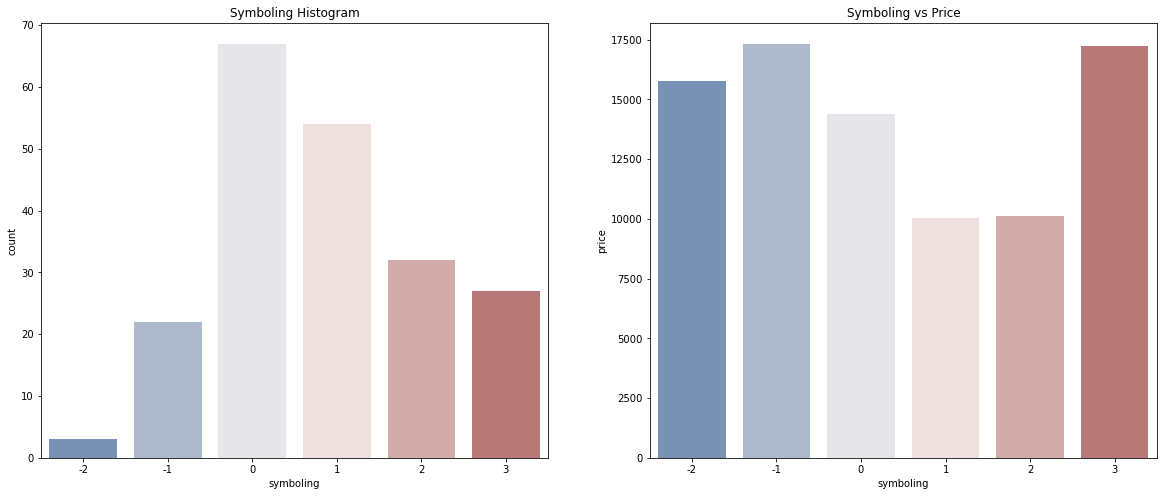

In [28]:
#Symboling with price relationship
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(df.symboling, palette= ("vlag"))
plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.barplot(x=df.symboling, y=df.price, palette= ("vlag"), ci=None)
plt.show()

#In the symboling Histogram the symboling with 0 and 1 values have high number of rows which means they're likely to be sold
#In Symboling vs Price graph, the cars with -1 symboling seems to be high priced because insurance risk rating -1 is good. 

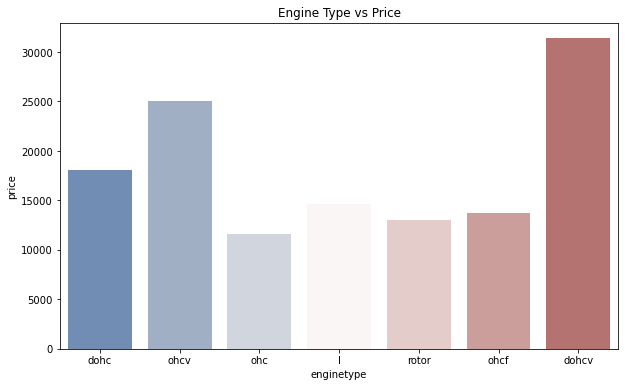

In [29]:
#Engine type with price relationship
plt.figure(figsize=(10,6))
plt.title('Engine Type vs Price')
sns.barplot(x=df.enginetype, y=df.price, palette= ("vlag"), ci=None)
plt.show()
#dohcv has the highest price range, ohc has the lowest price range.

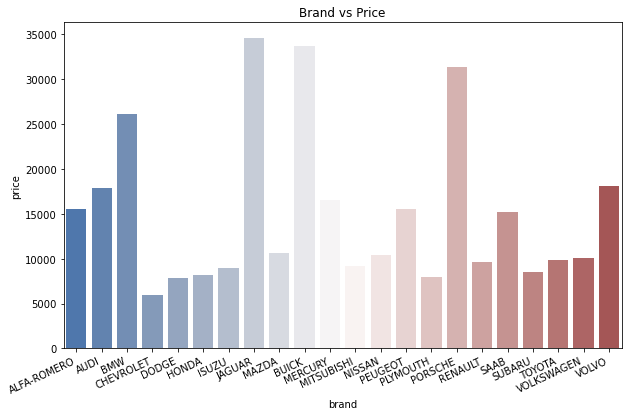

In [30]:
#Brand with price relationship
plt.figure(figsize=(10,6))
plt.title('Brand vs Price')
sns.barplot(x=df.brand, y=df.price, ci=None, palette= ("vlag"))
plt.xticks(rotation=25, ha='right');
#Jaquar and Buick seems to have the highest prices over the other brand, Chevrolet has the lowest price


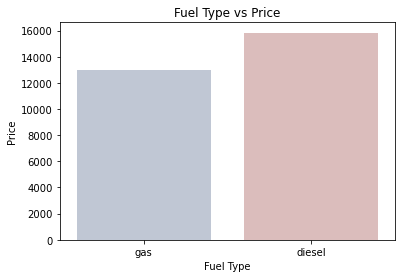

In [31]:
plt1= sns.barplot(x=df.fueltype, y=df.price, ci=None,palette= ("vlag"))
plt1.set(title = 'Fuel Type vs Price', xlabel = 'Fuel Type', ylabel= 'Price')
plt.show()
#It seems that cars with fuel type diesel have high price unlike cars with fuel type gas 

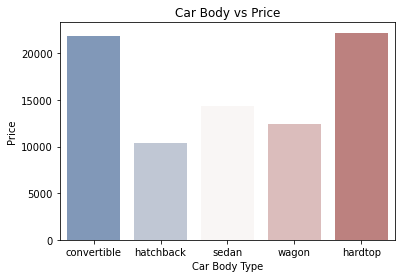

In [32]:
plt1= sns.barplot(x=df.carbody, y=df.price, ci=None, palette= ("vlag"))
plt1.set(title = 'Car Body vs Price', xlabel = 'Car Body Type', ylabel= 'Price')
plt.show()
# Convertible and Hardtop have similar price range and they have the highest price.

<AxesSubplot:title={'center':'Aspiration vs Price'}, xlabel='aspiration', ylabel='price'>

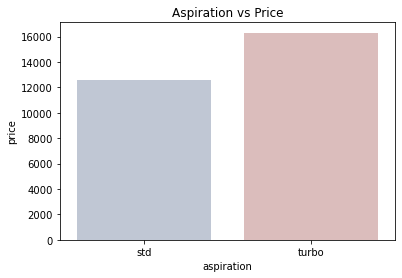

In [33]:
plt.title('Aspiration vs Price')
sns.barplot(x=df.aspiration, y=df.price, ci=None, palette= ("vlag"))
#We can see that turbo seems to have highest price than std.

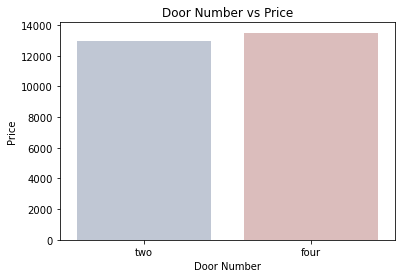

In [34]:
plt2 = sns.barplot(x=df.doornumber, y=df.price, ci=None, palette= ("vlag"))
plt2.set(title = 'Door Number vs Price', xlabel = 'Door Number', ylabel= 'Price');
#We can see that door number is not affacting the price.

In [35]:
df.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'price', 'brand', 'mileage'],
      dtype='object')

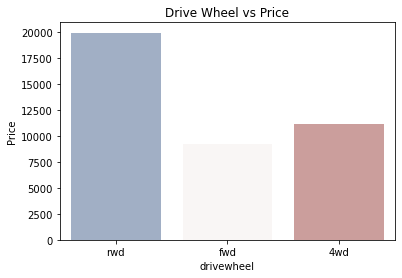

In [36]:
plt2 = sns.barplot(x=df.drivewheel, y=df.price, ci=None, palette= ("vlag"))
plt2.set(title = 'Drive Wheel vs Price', xlabel = 'drivewheel', ylabel= 'Price');

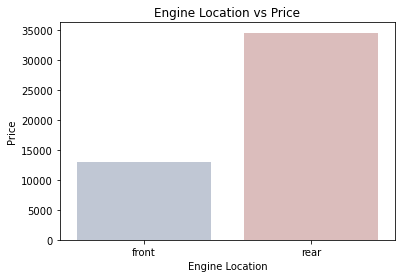

In [37]:
plt2 = sns.barplot(x=df.enginelocation, y=df.price, ci=None, palette= ("vlag"))
plt2.set(title = 'Engine Location vs Price', xlabel = 'Engine Location', ylabel= 'Price');
#rear engine have high price

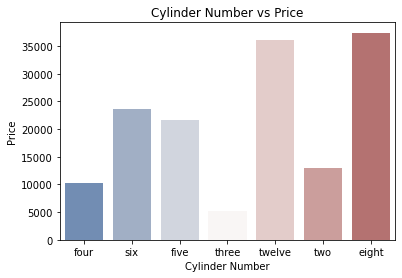

In [38]:
plt2 = sns.barplot(x=df.cylindernumber, y=df.price, ci=None, palette= ("vlag"))
plt2.set(title = 'Cylinder Number vs Price', xlabel = 'Cylinder Number', ylabel= 'Price');
#cars with twelve and eight clyinder tends to be pricey 

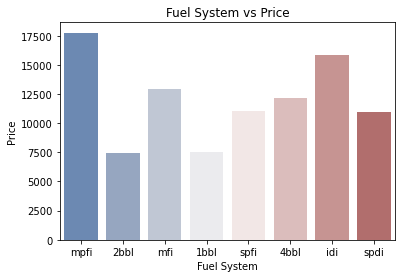

In [39]:
plt2 = sns.barplot(x=df.fuelsystem, y=df.price, ci=None, palette= ("vlag"))
plt2.set(title = 'Fuel System vs Price', xlabel = 'Fuel System', ylabel= 'Price');
#mpfi and idi have the highest price and they may affect the price

### Numeric Data Visualization with our target Price feature

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [41]:
nums = df[['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize','boreratio','stroke','compressionratio','horsepower', 'peakrpm','price','mileage']]

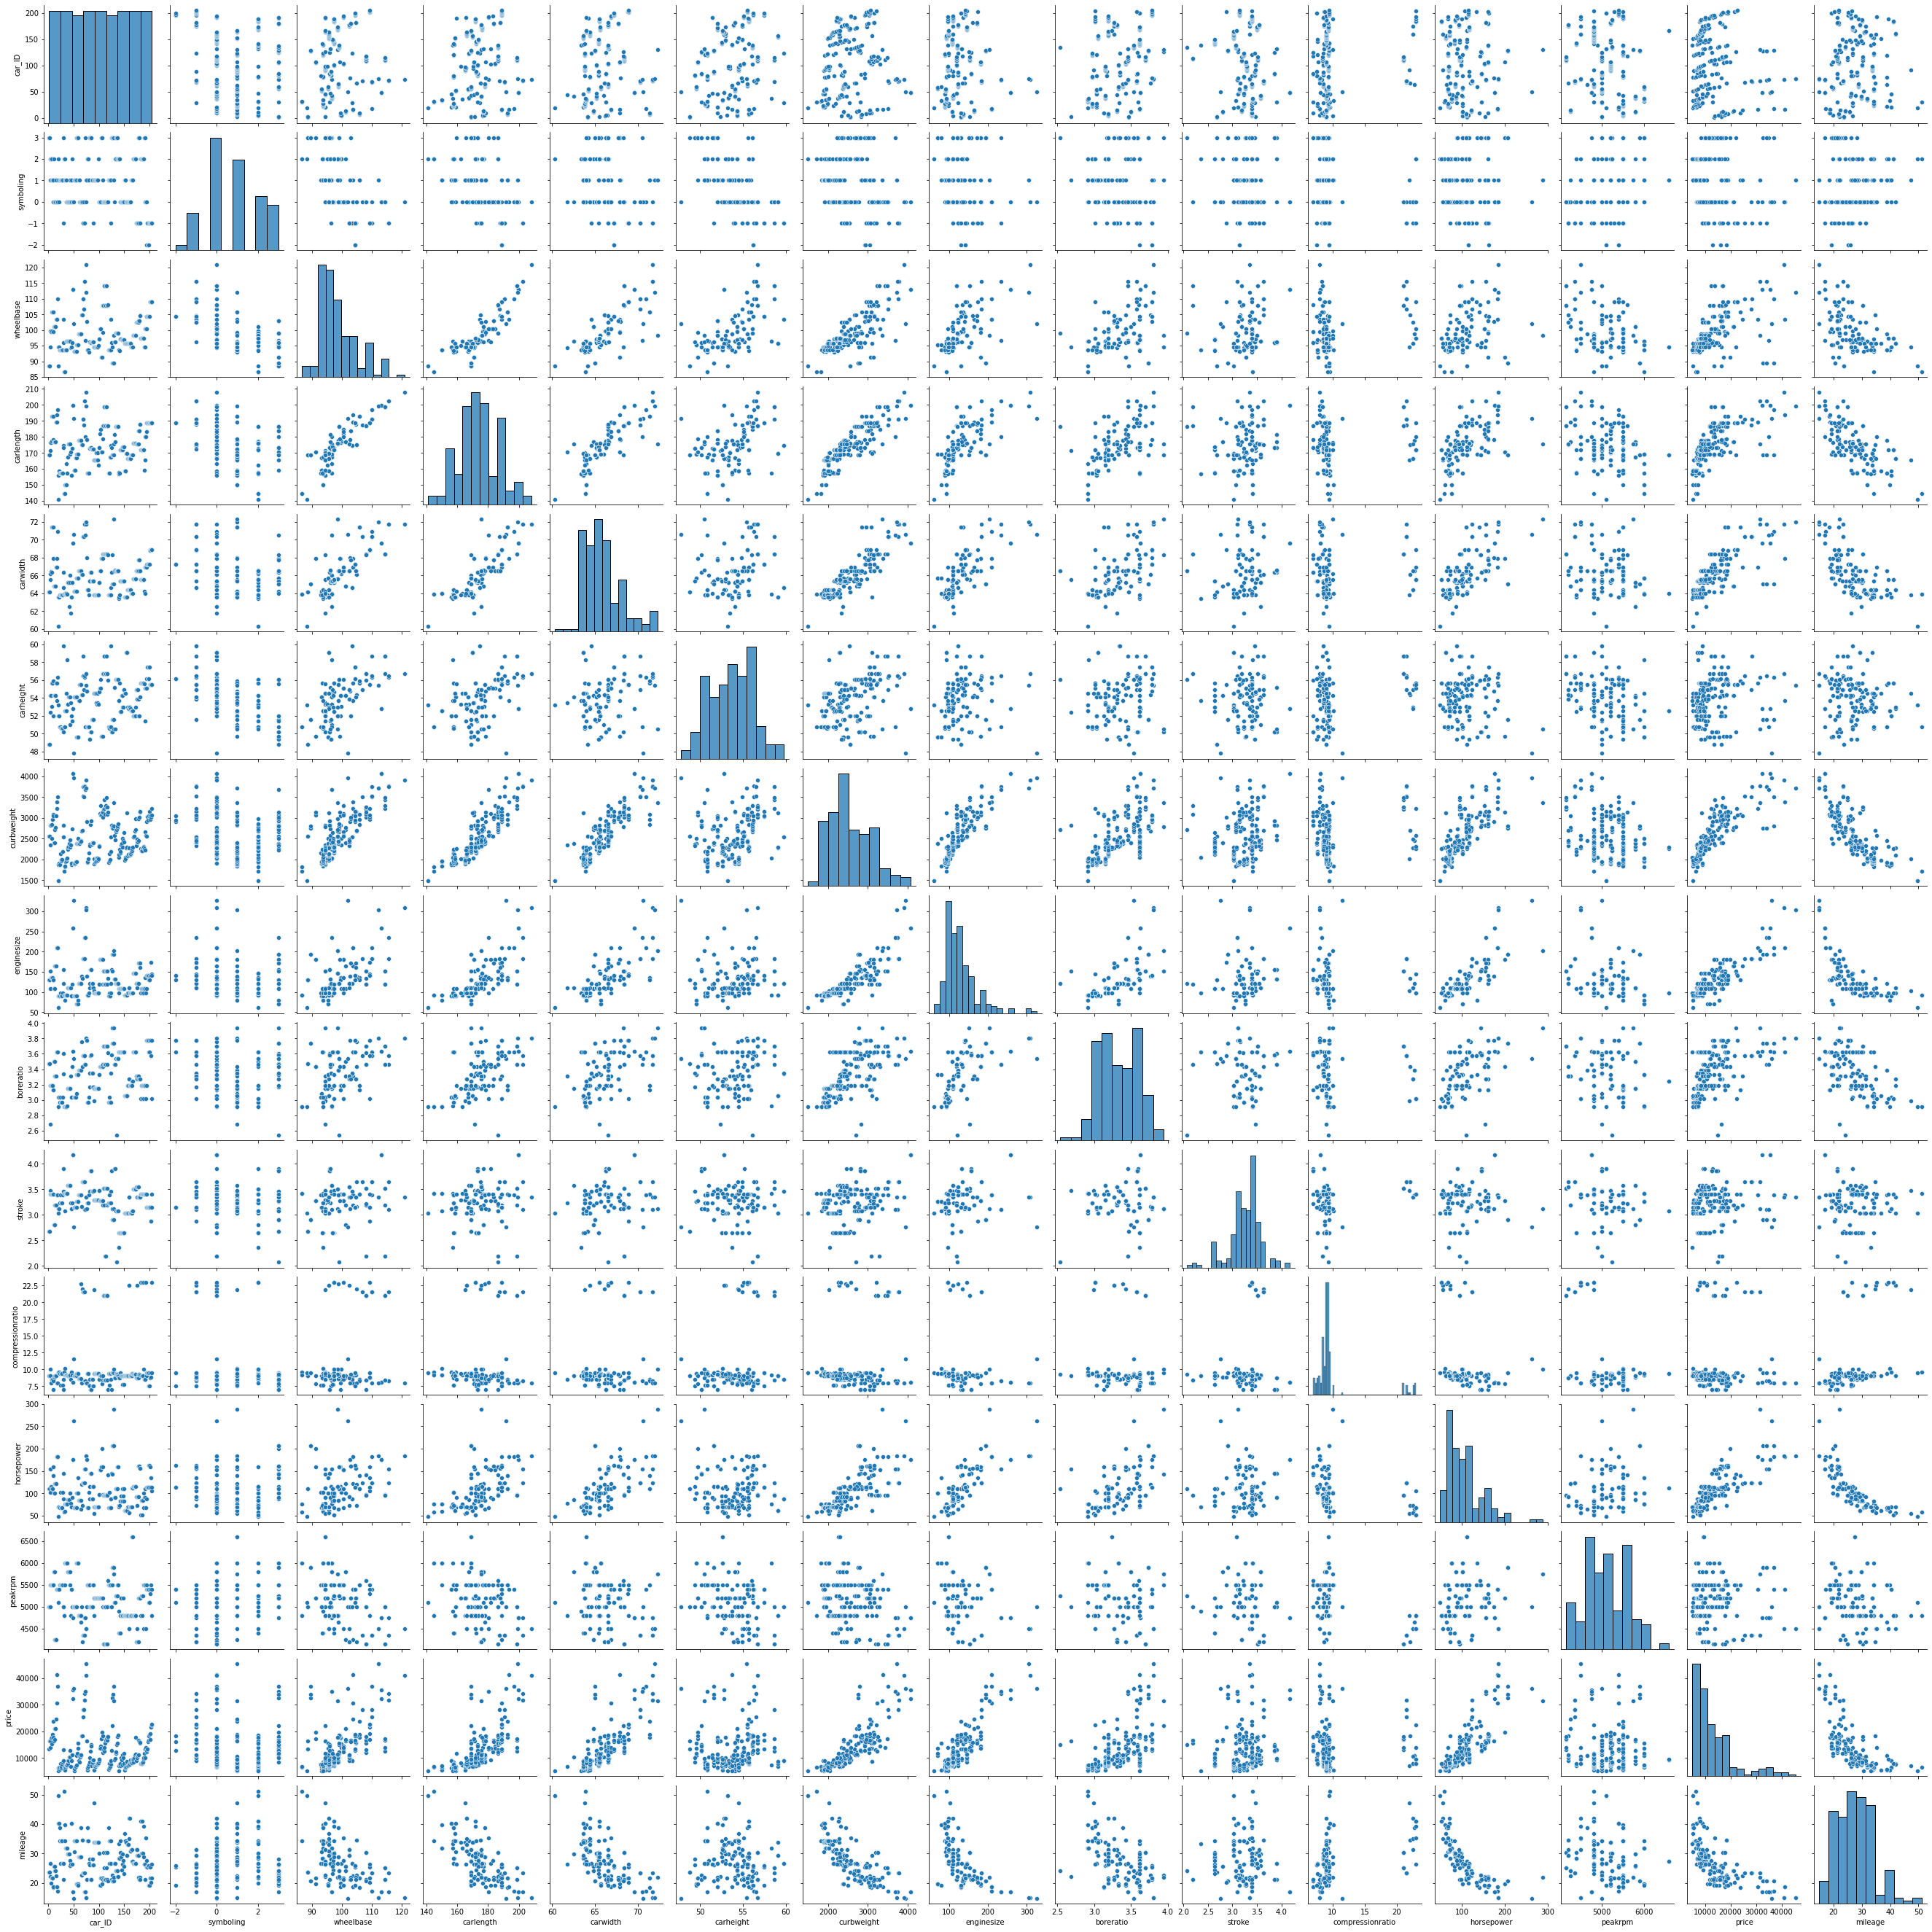

In [42]:
sns.pairplot(df)
#we can see some linearity between some of our numeric data with our target and their are also some multiconlinearity

<AxesSubplot:>

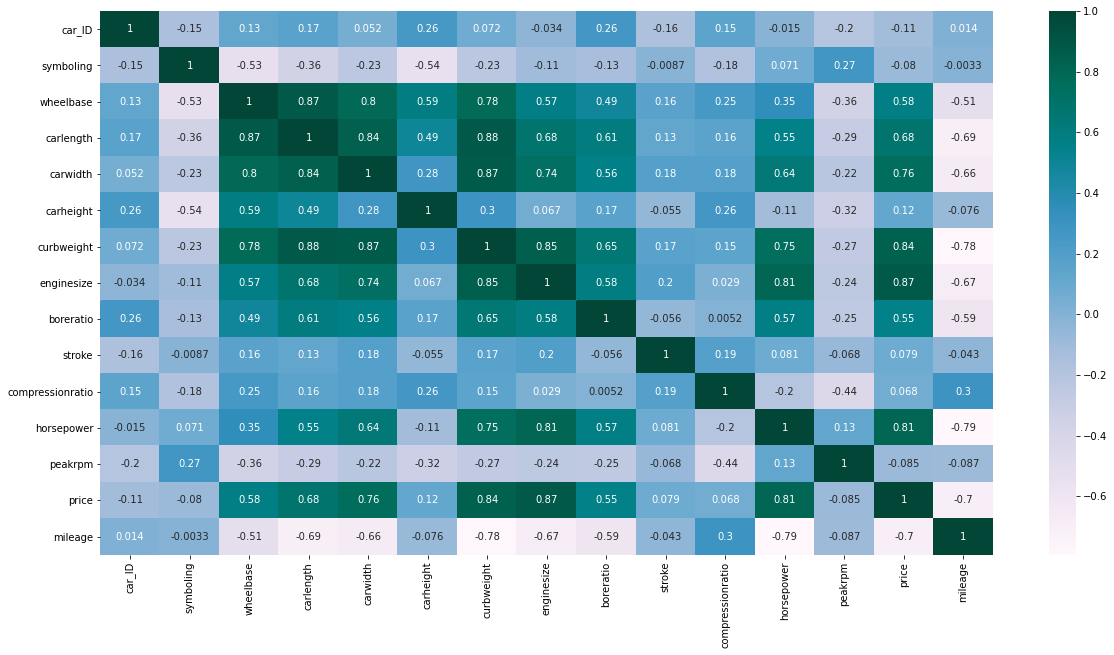

In [43]:
ig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(df.corr(),cmap='PuBuGn',annot=True)

In [44]:
# after visualization we can derive some features that significantly affect the price 
# wheelbase,carlength, carwidth, carbweightm, enginesize, boreratio, horsepower, mileage, 'fueltype', 'aspiration', 'carbody', 'drivewheel'

# Data Preprocessing

### Creating dummies

In [45]:
cars = df[['fueltype', 'aspiration', 'carbody', 'drivewheel', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize',  'boreratio', 'horsepower', 'price', 'mileage']]

In [46]:
cyl_no = pd.get_dummies(df['cylindernumber'], drop_first = True)
cars = pd.concat([cars,cyl_no], axis = 1)

In [47]:
fuel_type = pd.get_dummies(df['fueltype'], drop_first = True)
cars = pd.concat([cars,fuel_type], axis = 1)

In [48]:
asp = pd.get_dummies(df['aspiration'], drop_first = True)
cars = pd.concat([cars,asp], axis = 1)

In [49]:
carb = pd.get_dummies(df['carbody'], drop_first = True)
cars = pd.concat([cars,carb], axis = 1)

In [50]:
drive_wheel = pd.get_dummies(df['drivewheel'], drop_first = True)
cars = pd.concat([cars,drive_wheel], axis = 1)

In [51]:
engType = pd.get_dummies(df['enginetype'], drop_first = True)
cars = pd.concat([cars,engType], axis = 1)

In [52]:
cars.head()

,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,...,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor
0,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,...,0,0,0,1,0,0,0,0,0,0
1,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,...,0,0,0,1,0,0,0,0,0,0
2,gas,std,hatchback,rwd,94.5,171.2,65.5,2823,ohcv,six,...,0,0,0,1,0,0,0,0,1,0
3,gas,std,sedan,fwd,99.8,176.6,66.2,2337,ohc,four,...,1,0,1,0,0,0,1,0,0,0
4,gas,std,sedan,4wd,99.4,176.6,66.4,2824,ohc,five,...,1,0,0,0,0,0,1,0,0,0


In [53]:
cars.drop(['fueltype', 'aspiration', 'carbody', 'drivewheel','cylindernumber','enginetype'], axis = 1, inplace = True)

In [54]:
cars.columns

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'price', 'mileage', 'five', 'four', 'six',
       'three', 'twelve', 'two', 'gas', 'turbo', 'hardtop', 'hatchback',
       'sedan', 'wagon', 'fwd', 'rwd', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv',
       'rotor'],
      dtype='object')

In [55]:
#cars is our final dataframe that we will be using during modeling and it contains only data that are has a relation with price and affect it.

# Model Building

### Scaling numeric data

In [56]:
np.random.seed(0)
df_train, df_test = train_test_split(cars, train_size = 0.7, test_size = 0.3, random_state = 100)

In [57]:
scaler = MinMaxScaler()
num_vars = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'price', 'mileage']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [58]:
df_train.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,mileage,five,...,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor
122,0.244828,0.426016,0.291667,0.272692,0.139623,0.230159,0.083333,0.068818,0.530864,0,...,1,0,1,0,0,0,1,0,0,0
125,0.272414,0.452033,0.666667,0.500388,0.339623,1.000000,0.395833,0.466890,0.213992,0,...,0,0,0,1,0,0,1,0,0,0
166,0.272414,0.448780,0.308333,0.314973,0.139623,0.444444,0.266667,0.122110,0.344307,0,...,0,0,0,1,0,0,0,0,0,0
1,0.068966,0.450407,0.316667,0.411171,0.260377,0.626984,0.262500,0.314446,0.244170,0,...,0,0,0,1,0,0,0,0,0,0
199,0.610345,0.775610,0.575000,0.647401,0.260377,0.746032,0.475000,0.382131,0.122085,0,...,0,1,0,1,0,0,1,0,0,0


In [59]:
df_train.columns

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'price', 'mileage', 'five', 'four', 'six',
       'three', 'twelve', 'two', 'gas', 'turbo', 'hardtop', 'hatchback',
       'sedan', 'wagon', 'fwd', 'rwd', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv',
       'rotor'],
      dtype='object')

<AxesSubplot:>

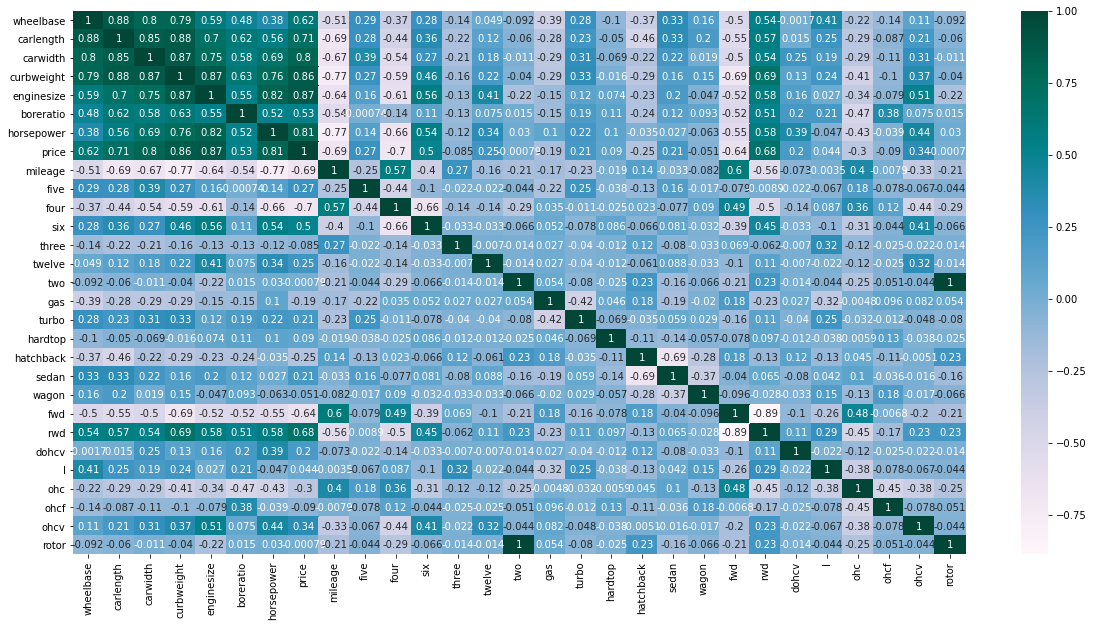

In [60]:
ig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(df_train.corr(),cmap='PuBuGn',annot=True)

In [61]:
df_train.describe()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,mileage,five,...,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.411141,0.525476,0.461655,0.407878,0.241351,0.497946,0.227302,0.219310,0.358265,0.062937,...,0.475524,0.132867,0.594406,0.349650,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972
std,0.205581,0.204848,0.184517,0.211269,0.154619,0.207140,0.165511,0.215682,0.185980,0.243703,...,0.501156,0.340624,0.492733,0.478536,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.272414,0.399187,0.304167,0.245539,0.135849,0.305556,0.091667,0.067298,0.198903,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.341379,0.502439,0.425000,0.355702,0.184906,0.500000,0.191667,0.140343,0.344307,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.503448,0.669919,0.550000,0.559542,0.301887,0.682540,0.283333,0.313479,0.512346,0.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Spliting into Train and Test

In [62]:
y = df_train.pop('price')
X = df_train

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [64]:
X_test.shape

(43, 28)

In [65]:
X_train.shape

(100, 28)

In [66]:
y_train.shape

(100,)

In [67]:
y_test.shape

(43,)

In [120]:
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(normalize=True)

In [121]:
pred = lin_reg.predict(X_test)

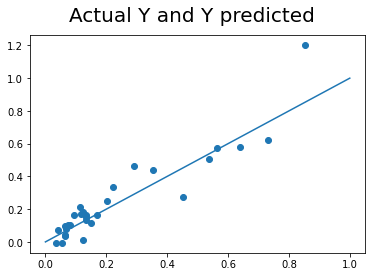

In [122]:
fig = plt.figure()
plt.scatter(y_test,pred)
plt.plot(np.linspace(0,1), np.linspace(0,1))
fig.suptitle('Actual Y and Y predicted', fontsize=20);

## Lasso Regression

In [123]:
# we have run the cross validation to find the best alpha, refit the model on all the data with that alpha
alphavec = 10**np.linspace(-2,2,200)

lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_train, y_train)

LassoCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       3.44896226e+01, 3.61234270e+01, 3.78346262e+01, 3.96268864e+01,
       4.15040476e+01, 4.34701316e+01, 4.55293507e+01, 4.76861170e+01,
       4.99450512e+01, 5.23109931e+01, 5.47890118e+01, 5.73844165e+01,
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        cv=5)

In [124]:
lasso_model.alpha_

0.01

In [125]:
list(zip(X_train.columns, lasso_model.coef_))
#some of our independent features got a coefficient to absloute zero in this case we eliminate them.
#'wheelbase','carlength','enginesize','boreratio','horsepower','mileage','five','six','three','twelve','two','gas','hardtop',
#'sedan','wagon','fwd','dohcv','l', 'ohc','ohcf','ohcv','rotor'

[('wheelbase', 0.0),
 ('carlength', 0.0),
 ('carwidth', 0.0040345391570811495),
 ('curbweight', 0.3188341161251648),
 ('enginesize', 0.0),
 ('boreratio', 0.0),
 ('horsepower', 0.0),
 ('mileage', -0.0),
 ('five', 0.0),
 ('four', -0.12877885744134762),
 ('six', 0.0),
 ('three', -0.0),
 ('twelve', 0.0),
 ('two', -0.0),
 ('gas', -0.0),
 ('turbo', 0.0),
 ('hardtop', 0.0),
 ('hatchback', -0.022343765697068644),
 ('sedan', 0.00039123966456231266),
 ('wagon', -0.0),
 ('fwd', -0.0),
 ('rwd', 0.10246880964371265),
 ('dohcv', 0.0),
 ('l', -0.0),
 ('ohc', 0.0),
 ('ohcf', 0.0),
 ('ohcv', 0.0),
 ('rotor', -0.0)]

In [126]:
pred = lasso_model.predict(X_test)

In [127]:
print('MSE',metrics.mean_squared_error(y_test, pred))

MSE 0.008081099480913467


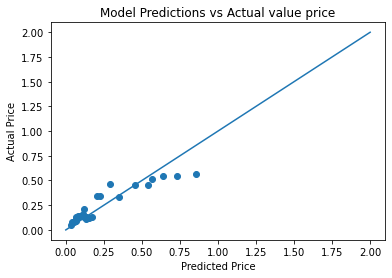

In [137]:
plt.scatter(y_test, pred)
plt.plot(np.linspace(0,2,50), np.linspace(0,2,50))
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Model Predictions vs Actual value price');

## Feature selection by Lasso, selecting high coefficient only

In [129]:
columns_names = X_train.columns.drop(['wheelbase','carlength','enginesize','boreratio','horsepower','mileage','five','six','three','twelve','two','gas','hardtop',
'sedan','wagon','fwd','dohcv','l', 'ohc','ohcf','ohcv','rotor'])
columns_names

Index(['carwidth', 'curbweight', 'four', 'turbo', 'hatchback', 'rwd'], dtype='object')

In [130]:
clf = Lasso(alpha=0.01)
clf.fit(X_train.loc[:,columns_names], y_train)

Lasso(alpha=0.01)

In [131]:
coeff = clf.coef_
coeff

array([ 0.00435387,  0.3185183 , -0.12881816,  0.        , -0.02263607,
        0.10246511])

In [132]:
preds = clf.predict(X_test.loc[:,columns_names])

Text(0.5, 1.0, 'Model Predictions vs Actual value price')

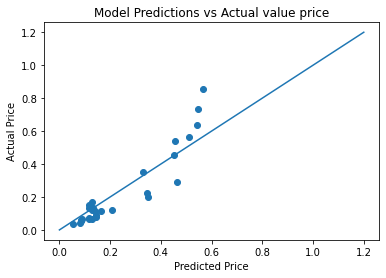

In [136]:
plt.scatter(preds, y_test)
plt.plot(np.linspace(0,1.2,50), np.linspace(0,1.2,50))
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Model Predictions vs Actual value price')

In [134]:
print('MSE',metrics.mean_squared_error(y_test, preds))

MSE 0.008084831871711601


# Assumption

### Assumption 1: regression is linear in parameters which is satisfied 

### Assumption 2: residuals should be normally distributed with zero mean

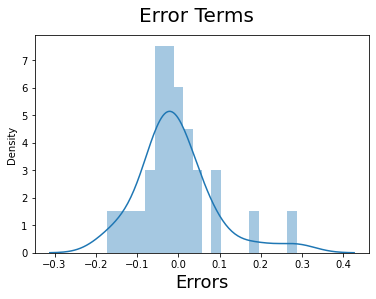

In [138]:
fig = plt.figure()
sns.distplot((y_test - pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18);

### Assumption 3: Error terms must have constant variance

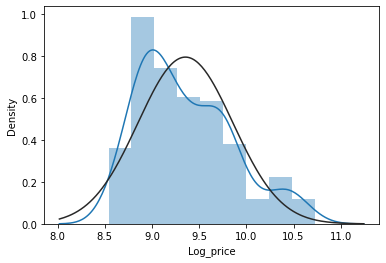

<Figure size 432x288 with 0 Axes>

In [139]:
df['Log_price'] = np.log(df['price'])
sns.distplot(df['Log_price'], fit=norm)
fig = plt.figure();

### Assumption 4: No independent variable is a perfect linear function of any other independent variable

#### we have few multicollinearity but most have dealt with in lasso regression

# Appendix

#### Model 1 

In [ ]:
#using only 3 features to see how the model work
features, target = ['carlength', 'carwidth', 'curbweight'], 'price'
X, y = df_train[features], df_train[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=8)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
print('MAE',metrics.mean_absolute_error(y_test, y_pred))
print('MSE',metrics.mean_squared_error(y_test, y_pred))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
coeff_df = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])
coeff_df

In [ ]:
lr.intercept_

In [ ]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
plt.plot(np.linspace(0,2), np.linspace(0,2))
fig.suptitle('Actual Y and Y predicted', fontsize=20);

In [ ]:
#using stats model for detailed info
import statsmodels.api as sm  
X_train = sm.add_constant(X_train)

In [ ]:
lm = sm.OLS(y_train,X_train).fit() 

In [ ]:
print(lm.summary())

In [ ]:
#using all numeric features to see how the model work
features, target = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower'], 'price'
X, y = df_train[features], df_train[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=8)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
print('MAE',metrics.mean_absolute_error(y_test, y_pred))
print('MSE',metrics.mean_squared_error(y_test, y_pred))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
coeff_df = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])
coeff_df

In [ ]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
plt.plot(np.linspace(0,2), np.linspace(0,2))
fig.suptitle('Actual Y and Y predicted', fontsize=20);

In [ ]:
import statsmodels.api as sm  
X_train = sm.add_constant(X_train)

In [ ]:
lm = sm.OLS(y_train,X_train).fit() 

In [ ]:
print(lm.summary())

#### Model 3

In [ ]:
#using all dummies features to see how the model work
features, target = ['five', 'four', 'six',
       'three', 'twelve', 'two', 'gas', 'turbo', 'hardtop', 'hatchback',
       'sedan', 'wagon', 'fwd', 'rwd', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv',
       'rotor'], 'price'
X, y = df_train[features], df_train[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=8)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
print('MAE',metrics.mean_absolute_error(y_test, y_pred))
print('MSE',metrics.mean_squared_error(y_test, y_pred))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
coeff_df = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])
coeff_df

In [ ]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
plt.plot(np.linspace(0,2), np.linspace(0,2))
fig.suptitle('Actual Y and Y predicted', fontsize=20);

#### Model 4

In [ ]:
#using all features to see how the model work
features, target = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower','five', 'four', 'six',
       'three', 'twelve', 'two', 'gas', 'turbo', 'hardtop', 'hatchback',
       'sedan', 'wagon', 'fwd', 'rwd', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv',
       'rotor'], 'price'
X, y = df_train[features], df_train[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=8)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
print('MAE',metrics.mean_absolute_error(y_test, y_pred))
print('MSE',metrics.mean_squared_error(y_test, y_pred))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
coeff_df = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])
coeff_df

In [ ]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
plt.plot(np.linspace(0,2), np.linspace(0,2))
fig.suptitle('Actual Y and Y predicted', fontsize=20);